# Fall 2021 Data Science Intern Challenge

## Canidate: **Joanne Middour**

**Problem:** 

[Click here to access the required data set](https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0)

Given some sample data, write a program to answer the following: 

On Shopify, we have exactly *100 sneaker shops*, and each of these shops sells only *one model of shoe*. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30-day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

Think about what could be going wrong with our calculation. 

- Think about a better way to evaluate this data. 
- What metric would you report for this dataset?
- What is its value?


## Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Exploritory Data Analysis (EDA)

Read in the data and look at it to see what I have to work with.

Things to look for:
- How many observations are in this data?
- How many columns are in this data?
- What types of data do I have?
- What is the main column(s) I need to focus on that will be most helpful?
- Are there any outliers?
- If there are outliers, might have to remove them to get an accurate value.

In [2]:
# Read in the dataset as a pandas DataFrame
orders = pd.read_csv(
    "/content/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv"
    )

# Look at the number of observations and columns in the dataset
print(orders.shape)

# Look at the first five rows of the DataFrame
orders.head()

(5000, 7)


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [3]:
# What does the last five rows of the DataFrame look like?
orders.tail()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18
4999,5000,44,734,288,2,debit,2017-03-18 15:48:18


In [4]:
# Make sure all of the shop ids are equal to the number of sneaker shops
orders.shop_id.value_counts()

# The problem states that there are 100 sneaker shops and there are 100 unique
#   shop_ids, so that tells me that I can assume these are all the sneaker
#   shop ids and that there are no other shops included in this data.

53    68
71    66
19    64
13    63
89    61
      ..
74    38
56    37
67    37
38    35
85    35
Name: shop_id, Length: 100, dtype: int64

In [5]:
# Check if there are any null/NaN values
orders.isnull().sum()

# There are no null/NaN values in this dataset

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

Take a look at the statistical data for this dataset:

In [6]:
# Look at the statistics of the data
orders.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


After looking at the statistical data, it is obvious that there are some outliers in the `order_amount` feature. I can assume that this is where the `AOV of $3145.13` came from. Since this is telling me that the mean (average) of this feature (column) is `$3145.128000`.

Based on just this little piece of information I can already infer that there are outliers in this data. Some things that alert me to this are:
- The mean is `3145.128000`
- However, the 50 percentile is only `284.000000`, 
- and the 75 percentile is only `390.000000`

Need to do further analysis to determine how to handle these outliers.

### Visualizations

Create some visualiztions to get a better feel for the data.

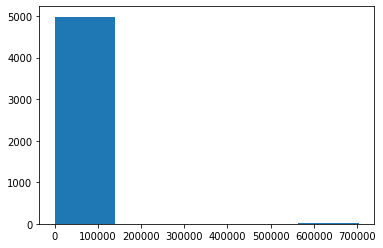

In [7]:
# Check for outliers using a histogram
plt.hist(orders.order_amount, bins=5);

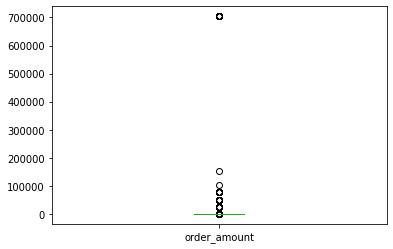

In [8]:
# Plot out the order amounts using a box plot
orders.order_amount.plot(kind='box');

Can see from the histogram and the box plot where the outliers fall. With the data I have been given I will try to explore it futher to see if I can find out why these amounts vary so much from the majority. 

### Futher Exploration


In [9]:
# What is the median amount for the orders
orders.order_amount.median()

284.0

In [10]:
# Look at the top 30 highest order amounts and the number of times they appear
orders.order_amount.value_counts().sort_index(ascending=False).head(30)

704000    17
154350     1
102900     1
77175      9
51450     16
25725     19
1760       1
1408       2
1086       1
1064       1
1056       3
980        1
965        1
960        2
948        1
935        3
920        1
890        1
885        2
880        3
865        2
845        1
830        3
816        1
815        2
810        1
805        2
804        2
800        3
790        2
Name: order_amount, dtype: int64

The majority of these values are occuring a small number of times, i.e. 1-3 times, and the ones that are occuring more frequently are still not of real significance being that the dataset is 5000 observations, but it is enough that it will throw off the mean (average) value.

In [11]:
# Create an "outlier" column for any order amount that is greater than the 
#   75 percentile value, adding a 1 to the column if it is an outlier and 
#   a 0 to the column if it is not considered an outlier
orders['outlier'] = np.where(orders.order_amount > 390, 1, 0)

# Check my work by looking at the first 5 rows of the orders dataset
orders.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,outlier
0,1,53,746,224,2,cash,2017-03-13 12:36:56,0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,0


Now that I have a column that seperates the outliers from the non-outlier, I can create a new DataFrame with just the outliers for further exploration.

In [12]:
# Pull all the rows where the outlier value is 1 and create a new DataFrame
outliers = orders.loc[orders['outlier'] == 1]

# Check my work
print(outliers.shape)
# Explore some of the values
outliers.head(20)

(1247, 8)


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,outlier
14,15,87,849,447,3,credit_card,2017-03-10 11:23:18,1
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,1
19,20,63,898,408,3,credit_card,2017-03-29 15:11:52,1
21,22,97,789,486,3,credit_card,2017-03-04 15:44:00,1
22,23,88,985,704,4,credit_card,2017-03-22 1:19:41,1
24,25,73,917,495,3,cash,2017-03-03 13:01:03,1
32,33,76,712,465,3,credit_card,2017-03-10 23:54:10,1
36,37,84,979,459,3,credit_card,2017-03-05 22:44:34,1
42,43,18,934,624,4,debit,2017-03-21 6:59:10,1
45,46,29,969,652,4,credit_card,2017-03-04 8:58:23,1


In [13]:
# Get the sum of all of the total items in the orders dataset
tot_items = orders.total_items.sum()
# Get the sum of all of the order amounts in the orders dataset
tot_amt = orders.order_amount.sum()

print(f'Total number of items purchased: {tot_items}\n')
print(f'Total amount of sales: ${tot_amt:,.2f}\n')
print(f'Average price per item: ${tot_amt/tot_items:,.2f}\n')

Total number of items purchased: 43936

Total amount of sales: $15,725,640.00

Average price per item: $357.92



I can see from the above values that the average price per item, with the outliers included, is approximately $357.92. To me this seems fairly high for a pair of sneakers, but I do believe this could be possible. However, I do not believe that this is a normal thing and based on the data pattern, this does not appear to be normal. 

My next step is to remove the outliers, since I have limited data on why these outliers are occuring.

In [14]:
# Create a new DataFrame without the outliers
no_outliers = orders.loc[orders['outlier'] == 0]

# Check my work
print(no_outliers.shape)
# Look at some of the data
no_outliers.head(20)

(3753, 8)


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,outlier
0,1,53,746,224,2,cash,2017-03-13 12:36:56,0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,0
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01,0
6,7,87,915,149,1,cash,2017-03-01 21:37:57,0
7,8,22,761,292,2,cash,2017-03-08 2:05:38,0
8,9,64,914,266,2,debit,2017-03-17 20:56:50,0
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26,0


In [15]:
# Get the sum of the total items without the outliers
tot_items = no_outliers.total_items.sum()
# Get the sum of the total order amounts without the outliers
tot_amt = no_outliers.order_amount.sum()
# Get the total number of occurances without the outliers
num_sales = no_outliers.shape[0]

print(f'Total number of items purchased without outliers: {tot_items}\n')
print(f'Total amount of sales without outliers: ${tot_amt:,.2f}\n')
print(f'Total number of sales without outliers: {num_sales}\n')
print(f'Average price per item without outliers: ${tot_amt/tot_items:,.2f}\n')
print(f'Average sale amount without the outliers: ${tot_amt/num_sales:,.2f}\n')
print(
    f'Median order amount with outliers: ${orders.order_amount.median():,.2f}\n'
    )
print(
    f'Median order amount without outliers: \
${no_outliers.order_amount.median():,.2f}\n'
    )

Total number of items purchased without outliers: 5880

Total amount of sales without outliers: $864,914.00

Total number of sales without outliers: 3753

Average price per item without outliers: $147.09

Average sale amount without the outliers: $230.46

Median order amount with outliers: $284.00

Median order amount without outliers: $224.00



In [16]:
# Look at the statistics of the orders dataset without the outliers
no_outliers.describe()

,order_id,shop_id,user_id,order_amount,total_items,outlier
count,3753.000000,3753.000000,3753.000000,3753.000000,3753.000000,3753.0
mean,2513.408740,49.369571,850.266454,230.459366,1.566747,0.0
std,1446.148414,29.143076,86.773818,85.971642,0.588973,0.0
min,1.000000,1.000000,700.000000,90.000000,1.000000,0.0
25%,1261.000000,24.000000,776.000000,153.000000,1.000000,0.0
50%,2519.000000,49.000000,851.000000,224.000000,2.000000,0.0
75%,3767.000000,74.000000,925.000000,312.000000,2.000000,0.0
max,5000.000000,100.000000,999.000000,390.000000,4.000000,0.0


Now that the outliers have been removed, this mean (average) looks a lot more reasonable and make more logical sense.

So the **AOV** is actually **$230.46**